# Rent the Runway Fit Data & Reviews

The original json file was found on the UCSD machine learning repository. 
http://cseweb.ucsd.edu/~jmcauley/datasets.html

### Import Libraries and Data

In [1]:
#Data cleaning
import json
import numpy as np
import pandas as pd

In [2]:
#Function to get the json file 
def get_json(filepath):
    with open(filepath, 'r') as fp:
        return json.load(fp)

In [3]:
data = []

with open('./data/renttherunway_final_data.json') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
#Check the data 
data[1]

{'fit': 'fit',
 'user_id': '273551',
 'bust size': '34b',
 'item_id': '153475',
 'weight': '132lbs',
 'rating': '10',
 'rented for': 'other',
 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
 'body type': 'straight & narrow',
 'review_summary': 'I felt so glamourous!!!',
 'category': 'gown',
 'height': '5\' 6"',
 'size': 12,
 'age': '36',
 'review_date': 'June 18, 2013'}

In [5]:
df = pd.DataFrame(data)
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28,hourglass,34d,romper,fit,"5' 8""",2260466,10,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36,straight & narrow,34b,gown,fit,"5' 6""",153475,10,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116,NaN,NaN,sheath,fit,"5' 4""",1063761,10,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34,pear,34c,dress,fit,"5' 5""",126335,8,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27,athletic,34b,gown,fit,"5' 9""",616682,10,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [6]:
# df.to_csv('original_rent_the_runway.csv', index=False)

In [7]:
df.shape

(192544, 15)

# EDA & Cleaning 

In [8]:
def clean_data(df):
    
    #Drop the null values 
    df.dropna(inplace=True)
    
    #remove text from weight
    df['weight'] = df['weight'].str.replace('lbs', ' ')
    
    #replace ' with decimal 
    df['height'] = df['height'].str.replace("'", ".")
    
    #remove " from height 
    df['height'] = df['height'].str.replace('"', " ")
    
    #Change column names to have underscores 
    df = df.rename(columns={'body type': 'body_type', 'bust size':'bust_size', 'rented for':'rented_for'})
    
    #Change to numeric dtypes
    df[['age', 'rating', 'item_id', 'size', 'user_id', 'weight']] = df[['age', 'rating', 'item_id', 'size', 'user_id', 'weight']].apply(pd.to_numeric)
    
    #Change date to correct dtpye
    df['review_date'] = pd.to_datetime(df['review_date'])
    
    return df

In [9]:
df = clean_data(df)

In [10]:
#Make the fit column numeric
df['fit'] = df['fit'].map({"fit":1, 'small': 0, 'large': 2})

In [11]:
 # Since I have so much data, I will take a small sample of it for modeling purposes so my computer can handle the modeling
sample_df = df.sample(frac=0.2, replace=False, random_state=42)

In [12]:
sample_df.shape

(29276, 15)

In [13]:
# sample_df.to_csv('./rent_the_runway_cleaned_no_dummies.csv', index = False)

# Data Viz (before dummies)

In [14]:
#Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns 

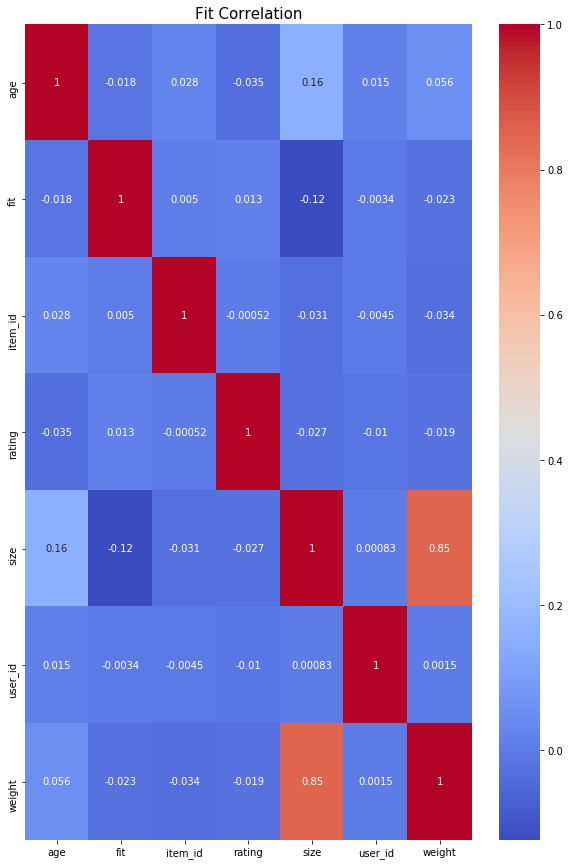

In [15]:
#Heatmap 

plt.figure(figsize= (10,15))
sns.heatmap(sample_df.corr(), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);

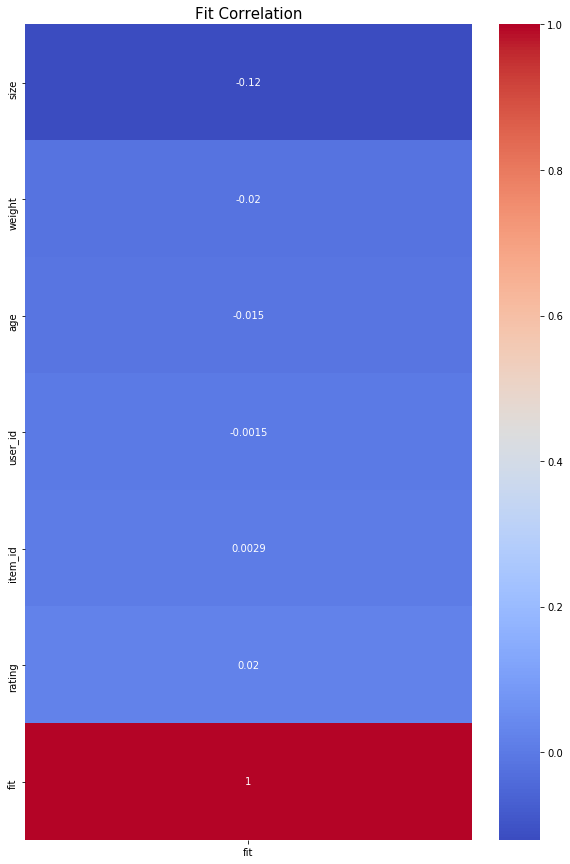

In [16]:
#Heatmap - Fit correlation

plt.figure(figsize= (10,15))
sns.heatmap(df.corr()[['fit']].sort_values('fit'), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);

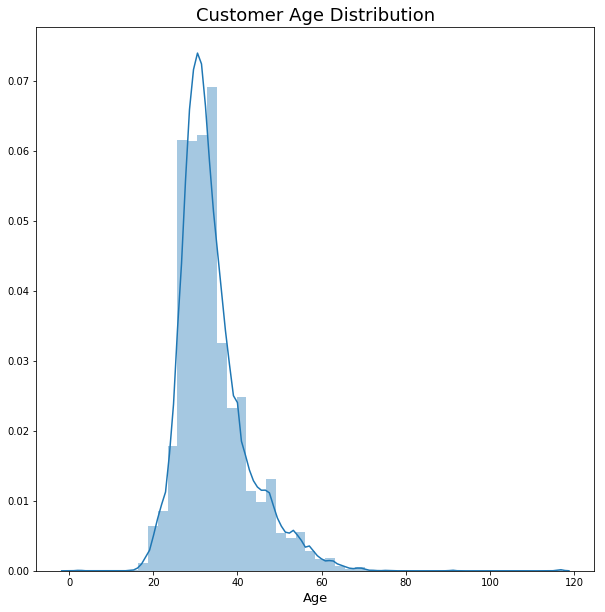

In [17]:
#Customer Age Distribution  

plt.figure(figsize=(10,10))
ax = sns.distplot(df['age']);
ax.set_title('Customer Age Distribution', size = 18)
ax.set_xlabel('Age', size = 13);

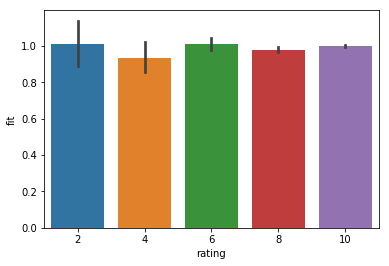

In [18]:
#Scatter plot of ratings and fit
sns.barplot(x='rating', y='fit', data= sample_df);

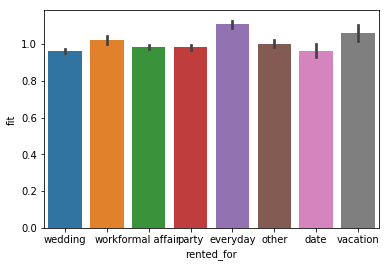

In [19]:
#Scatter plot of occasion and fit
sns.barplot(x='rented_for', y='fit', data= sample_df);

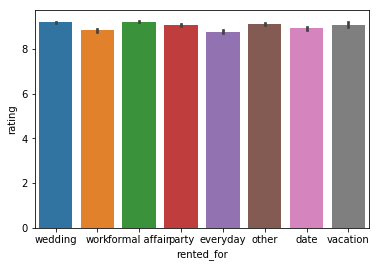

In [20]:
#Scatter plot of occasion and ratings 
sns.barplot(x='rented_for', y='rating', data= sample_df);

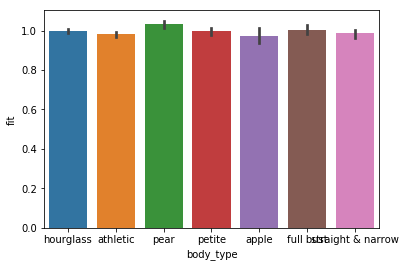

In [21]:
#Scatter plot of body type and fit 
sns.barplot(x='body_type', y='fit', data= sample_df);

# Dummies 

In [23]:
#Dummy the categorical columns 
sample_df = pd.get_dummies(data=sample_df, columns=['body_type','rented_for','category'])

In [24]:
sample_df.columns

Index(['age', 'bust_size', 'fit', 'height', 'item_id', 'rating', 'review_date',
       'review_summary', 'review_text', 'size', 'user_id', 'weight',
       'body_type_apple', 'body_type_athletic', 'body_type_full bust',
       'body_type_hourglass', 'body_type_pear', 'body_type_petite',
       'body_type_straight & narrow', 'rented_for_date', 'rented_for_everyday',
       'rented_for_formal affair', 'rented_for_other', 'rented_for_party',
       'rented_for_vacation', 'rented_for_wedding', 'rented_for_work',
       'category_ballgown', 'category_blazer', 'category_blouse',
       'category_blouson', 'category_bomber', 'category_caftan',
       'category_cami', 'category_cape', 'category_cardigan', 'category_coat',
       'category_combo', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster', 'category_frock',
       'category_gown', 'category_henley', 'category_hoodie',
       'category_jacket', 'category_jeans', 'category_jumpsuit',
    

In [25]:
sample_df.to_csv('./rent_the_runway_cleaned_with_dummies.csv', index = False)

In [26]:
sample_df.head()

,age,bust_size,fit,height,item_id,rating,review_date,review_summary,review_text,size,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
149201,36,34d,1,5. 5,815826,10,2017-09-18,"Good fit, great style, comfortable yet elegant",Rented for early brunch/garden wedding. My to...,20,...,0,0,0,0,0,0,0,0,0,0
2482,34,34c,1,5. 5,1636171,10,2017-04-19,Love the fit and fabric!,This dress was perfect. The fabric is thick an...,8,...,0,0,0,0,0,0,0,0,0,0
85833,30,34a,0,5. 8,438881,10,2017-10-18,"Simple black dress, loved the ruffles.",Wore this dress to a Naval Ball. The dress did...,13,...,0,0,0,0,0,0,0,0,0,0
8413,32,34d,1,5. 8,1392841,10,2017-08-07,One of my fav rentals,Loved this fun dress. The low V in the front m...,16,...,0,0,0,0,0,0,0,0,0,0
82576,34,34a,2,5. 7,160612,8,2015-01-05,Pretty but not meant for small chested girls,"Pretty dress, but I didn't have the bust to fi...",8,...,0,0,0,0,0,0,0,0,0,0


#### More EDA - After Dummies 

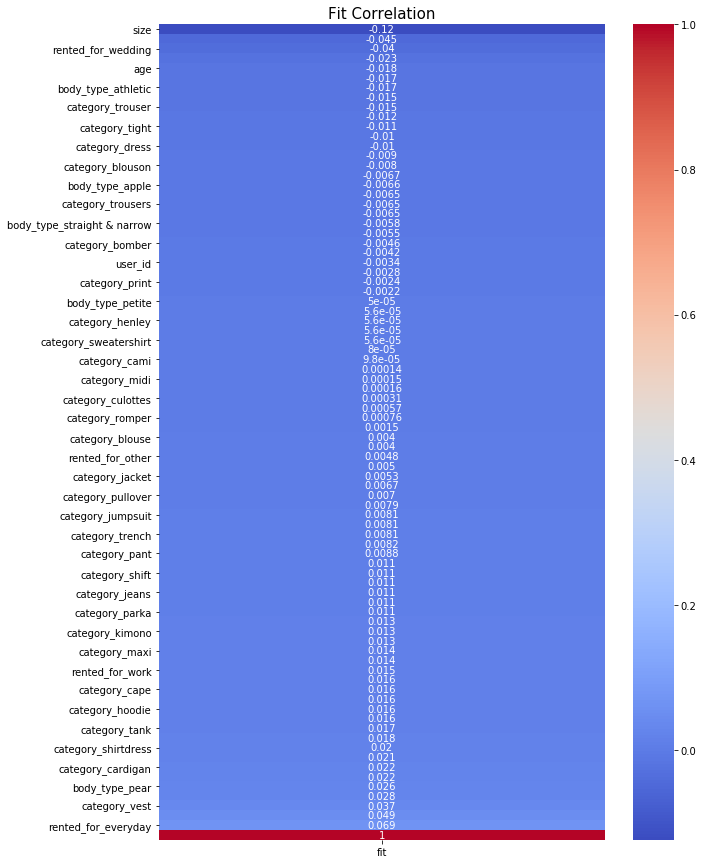

In [27]:
#Heatmap - Fit correlation

plt.figure(figsize= (10,15))
sns.heatmap(sample_df.corr()[['fit']].sort_values('fit'), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);